## Milestone 3


Importing necessary libraries and printing summary of available datasets


In [3]:
!pip install pymatgen       #General materials science package
!pip install matminer       #Machine learning materials science package
!pip uninstall pandas       #One of the above installers seems to use an old version
!pip install pandas==1.1.5  # of pandas that was causing some issues
#Display available datasets from matminer
from matminer.datasets import get_available_datasets
get_available_datasets()

  ERROR: Operation cancelled by user
     |████████████████████████████████| 9.5 MB 26.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matminer 0.7.4 requires pandas>=1.3.1, but you have pandas 1.1.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.


boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'wolverton_oxides']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Exploring and loading datasets

In [6]:
from matminer.datasets import load_dataset
from matminer.datasets import get_all_dataset_info

df_DEC = load_dataset("dielectric_constant")
print(df_DEC.describe())
dec_info = get_all_dataset_info("dielectric_constant")
print(dec_info)


Fetching dielectric_constant.json.gz from https://ndownloader.figshare.com/files/13213475 to /usr/local/lib/python3.7/dist-packages/matminer/datasets/dielectric_constant.json.gz


Fetching https://ndownloader.figshare.com/files/13213475 in MB: 0.8867839999999999MB [00:00, 157.72MB/s]      


            nsites  space_group  ...  poly_electronic   poly_total
count  1056.000000  1056.000000  ...      1056.000000  1056.000000
mean      7.530303   142.970644  ...         7.248049    14.777898
std       3.388443    67.264591  ...        13.054947    19.435303
min       2.000000     1.000000  ...         1.630000     2.080000
25%       5.000000    82.000000  ...         3.130000     7.557500
50%       8.000000   163.000000  ...         4.790000    10.540000
75%       9.000000   194.000000  ...         7.440000    15.482500
max      20.000000   229.000000  ...       256.840000   277.780000

[8 rows x 7 columns]
Dataset: dielectric_constant
Description: 1,056 structures with dielectric properties, calculated with DFPT-PBE.
Columns:
	band_gap: Measure of the conductivity of a material
	cif: optional: Description string for structure
	e_electronic: electronic contribution to dielectric tensor
	e_total: Total dielectric tensor incorporating both electronic and ionic contributions
	fo

Expirementing with the featurization tools in MatMiner 

In [9]:
from pymatgen.core import Composition
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.structure import DensityFeatures
import pandas as pd
import numpy as np

#Convert the strings from the 'formulas' column to pymatgen Composition objects
stc = StrToComposition()
featured_df = stc.featurize_dataframe(df_DEC, "formula")
print(featured_df.head())

#Featurize the Composition objects
ef = ElementFraction()
featured_df = ef.featurize_dataframe(featured_df, "composition")
print(featured_df.head())

#Featurize the pymatgen Structure objects
denf = DensityFeatures()
featured_df = denf.featurize_dataframe(featured_df, "structure")
print(featured_df.head())

print("\nCleaning:  100%  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#Remove non-integer columns
clean_df = featured_df.drop(["formula", "composition", "structure", "cif","poscar","meta","e_electronic", "e_total", "poly_electronic"], axis=1)
#Remove any columns with all 0 values (from the composition featurization)
cleaner_df = clean_df.loc[:, (clean_df != 0).any(axis=0)]
#Move Target value to index 1 (after id number)
cols = cleaner_df.columns.tolist()
cols.remove('poly_total')
cols.insert(1, 'poly_total')
final_df = cleaner_df[cols]
print(final_df.head())

print("\n--- Number of Columns ---")
print("Original: ", len(df_DEC.columns))
print("Featurized: ", len(featured_df.columns))
print("Cleaned: ", len(final_df.columns))
print("--------------------------")
print("Number of Entries: ", len(final_df))
print("__________________________")


ImportError: ignored

Save datafram as CSV

In [ ]:
final_df.to_csv("final0.csv", index=False)

####Linear Regression without the Split to Observe Feature Significance

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import pandas as pd
#final_df = pd.read_csv("/content/drive/Shareddrives/ENGS108 Final Project/final0.csv" )

X = final_df.iloc[:,2:]
y = final_df["poly_total"]

feature_list = final_df.iloc[:,2:].columns
feature_list

Index(['nsites', 'space_group', 'volume', 'band_gap', 'n', 'pot_ferroelectric',
       'H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P',
       'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
       'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs',
       'Ba', 'La', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl',
       'Pb', 'Bi', 'density', 'vpa', 'packing fraction'],
      dtype='object')

In [ ]:
# Importing the Sklearn LinerRegression module
from sklearn.linear_model import LinearRegression

# Fitting a liner regression to our data
reg = LinearRegression().fit(X, y)

# Forming a data frame from the coefficients
coefs = pd.DataFrame(
    reg.coef_,
    columns=["Coefficients"],
    index=feature_list,
)

coefs

,Coefficients
nsites,-0.028407
space_group,0.002291
volume,0.008170
band_gap,0.531409
n,16.041024
...,...
Pb,26.239685
Bi,35.951671
density,1.196058
vpa,-0.030749


In [ ]:
# Taking the absolute value of coefficients to sort them later
absolute_coefs = coefs.abs()

# Sorting the coefficients 
sorted_coefs = absolute_coefs.sort_values(by="Coefficients",ascending=False)
sorted_coefs

,Coefficients
Rh,61.189066
Zr,58.252436
Pt,56.632733
Tl,53.995642
Os,43.843995
...,...
V,0.065534
vpa,0.030749
nsites,0.028407
volume,0.008170


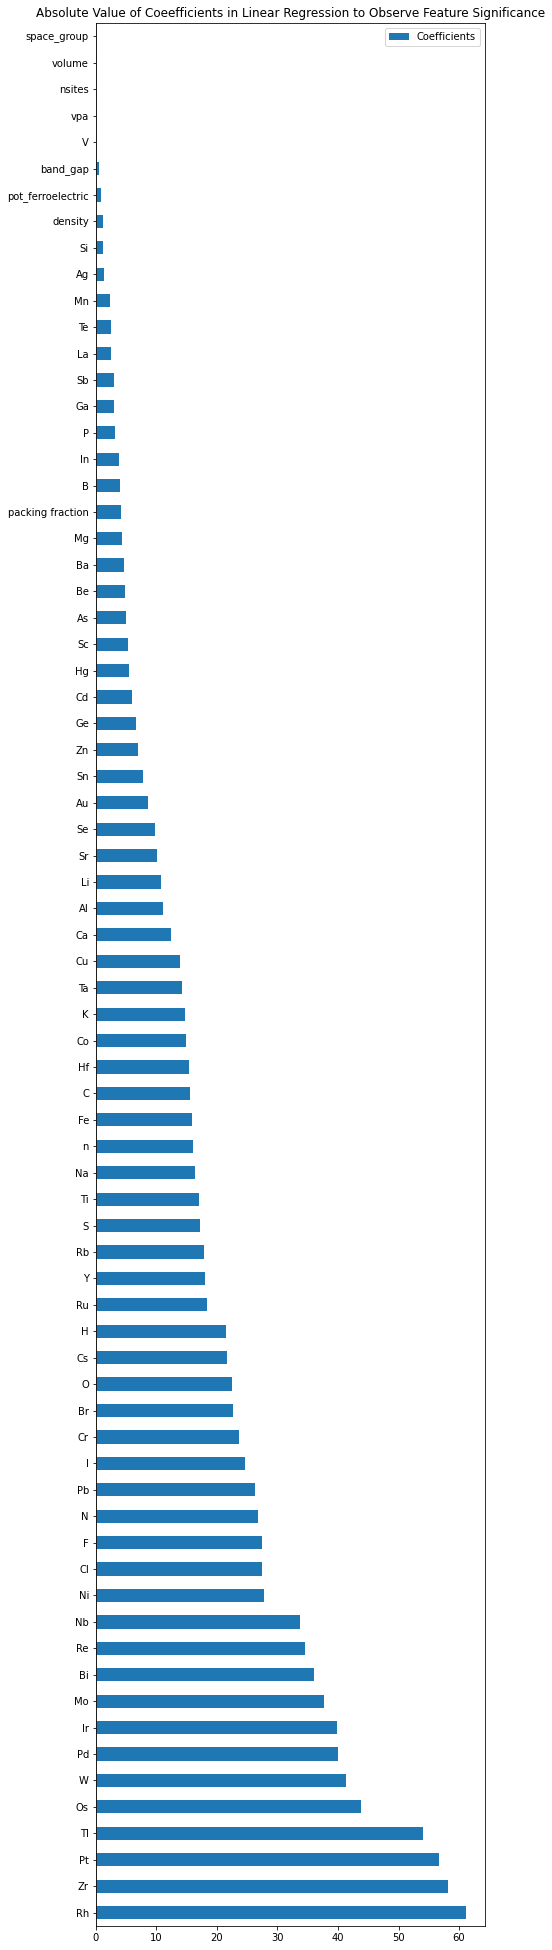

In [ ]:
import matplotlib.pyplot as plt

sorted_coefs.plot(kind="barh", figsize=(9, 35))
plt.title("Absolute Value of Coeefficients in Linear Regression to Observe Feature Significance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


Features with the smallest impact are: V, vpa, nsites, volume, space_group.

We can use this information later on as build on neural networks.

Train/Valid Split (for later...)

In [48]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [62]:
final_df = pd.read_csv('/content/drive/Shareddrives/ENGS108 Final Project/final0.csv')  
df = final_df.drop(columns=['material_id', 'V', 'vpa', 'nsites', 'volume', 'space_group'])
df["pot_ferroelectric"] = df["pot_ferroelectric"].astype(int)

STEP = 0.01

if step:
    step = int(1 / step)
# train test split
train = df.iloc[:850,:]
valid = df.iloc[851:,:]
test = valid.iloc[151:,:]
valid = valid.iloc[:150,:]

# remove label from x
x_train = train.drop(columns=['poly_total'])
x_train = x_train.to_numpy()

# get label
y_train0 = train['poly_total'].values

# turn to integers (0 decimal places)
if step:
    # turn to integers (0 decimal places)
    y_train0 = np.array([int(i * step) for i in y_train0])

    # one hot encode
    y_train = np.zeros((850, 300 * step))
    arg = np.arange(y_train0.size)
    y_train[arg, y_train0] = 1
else:
    y_train0 = np.array([int(i) for i in y_train0])

    y_train = np.zeros((850, 300))
    arg = np.arange(y_train0.size)
    y_train[arg, y_train0] = 1



# same as train
x_valid = valid.drop(columns=['poly_total'])
x_valid = x_valid.to_numpy()
y_valid0 = valid['poly_total'].values
if step:
    y_valid0 = np.array([int(i * step) for i in y_valid0])
    y_valid = np.zeros((150, 300 * step))
    argv = np.arange(y_valid0.size)
    y_valid[argv, y_valid0] = 1
else:
    y_valid0 = np.array([int(i) for i in y_valid0])
    y_valid = np.zeros((150, 300))
    argv = np.arange(y_valid0.size)
    y_valid[argv, y_valid0] = 1


# same as train
x_test = test.drop(columns=['poly_total'])
x_test = x_test.to_numpy()
y_test0 = test['poly_total'].values
if step:
    y_test0 = np.array([int(i * step) for i in y_test0])
    y_test = np.zeros((54, 300 * step))
    argvt = np.arange(y_test0.size)
    y_test[argvt, y_test0] = 1
else:
    y_test0 = np.array([int(i) for i in y_test0])
    y_test = np.zeros((54, 300))
    argvt = np.arange(y_test0.size)
    y_test[argvt, y_test0] = 1



In [50]:
class model:
    
    # step is accuracy you want the model to go to
    # eg: 1 for integers, 0.1 for 1 decimal place, and 0.01 for 2 decimal places
    def __init__(self, number_of_features, dielectric_max_val, steps=False):
        self.number_of_features = number_of_features
        self.dielectric_max_val = dielectric_max_val
        self.steps = steps
        self.model = self.make_model()

    def make_model(self):
        model = Sequential()

        # if step is defined
        if self.steps:

            # input layer
            model.add(Dense(16, input_shape= (None, self.number_of_features)), activation='relu')

            # hidden layer
            model.add(Dense(32, activation='linear'))

            # output hidden layer
            model.add(Dense(int(self.dielectric_max_val * 1 / self.steps), activation='linear'))

        else:
            # input layer
            model.add(Dense(16, input_shape=(None, self.number_of_features), activation='relu'))

            # hidden layer
            model.add(Dense(32, activation='linear'))

            # output hidden layer
            model.add(Dense(self.dielectric_max_val, activation='linear'))

        # compile
        model.compile(loss="mse", optimizer='Adam')

        return model

    def fit_model(self, x_train, y_train, x_valid, y_valid,):

        # suppress warnings
        tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

        # fit model
        self.model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=20, verbose=0)

    def predict(self, x_test, y_test):

        # predict the test set
        y_predicted = self.model.predict(x_test)
        mse = mean_squared_error(y_test, y_predicted)
        rmse = np.sqrt(mse)

        print(f"Mean Squared Error = {mse}")
        print(f"Root Mean Squared Error(rmse) = {rmse}. The predicted dielectric constant is the actual dielectric constant +/- rmse")

        plt.plot(range(len(y_predicted)), np.argmax(y_test, axis=1), lw=0.8, color="blue", label="Actual Val")
        plt.plot(range(len(y_predicted)), np.argmax(y_predicted, axis=1), lw=0.8, color="red", label="Predicted Val")
        plt.legend()
        plt.show()

In [51]:
final_df = pd.read_csv('/content/drive/Shareddrives/ENGS108 Final Project/final0.csv')  
df = final_df.drop(columns=['material_id', 'V', 'vpa', 'nsites', 'volume', 'space_group'])
df["pot_ferroelectric"] = df["pot_ferroelectric"].astype(int)

Mean Squared Error = 0.003156799539413256
Root Mean Squared Error(rmse) = 0.05618540325932756. The predicted dielectric constant is the actual dielectric constant +/- rmse


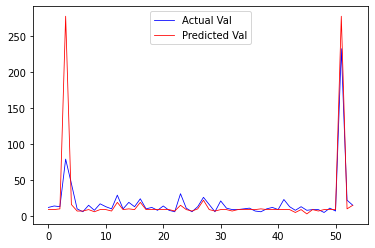

In [65]:
regression = model(67, 300, STEP)
regression.fit_model(x_train, y_train, x_valid, y_valid)
regression.predict(x_test, y_test)